In [42]:
#To import library
import pandas as pd
import numpy as pd
import matplotlib.pyplot as plt
#keep the plots in one place,calls images static png
%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
#To read the dataset
ds=pd.read_csv("D:/data_science/notebook/breast_c_Dataset.csv - breast_c_Dataset.csv.csv")

# Exploring the dataset

In [4]:
ds.describe()

,Unnamed: 0,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,284.000000,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,164.400426,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,142.000000,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,284.000000,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,426.000000,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,568.000000,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
#TO know the first 5 data & to get an idea how the dataset looks like
ds.head()

,Unnamed: 0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
ds.iloc[5]

Unnamed: 0                        5
id                           843786
diagnosis                         M
radius_mean                   12.45
texture_mean                   15.7
perimeter_mean                82.57
area_mean                     477.1
smoothness_mean              0.1278
compactness_mean               0.17
concavity_mean               0.1578
concave points_mean         0.08089
symmetry_mean                0.2087
fractal_dimension_mean      0.07613
radius_se                    0.3345
texture_se                   0.8902
perimeter_se                  2.217
area_se                       27.19
smoothness_se               0.00751
compactness_se              0.03345
concavity_se                0.03672
concave points_se           0.01137
symmetry_se                 0.02165
fractal_dimension_se       0.005082
radius_worst                  15.47
texture_worst                 23.75
perimeter_worst               103.4
area_worst                    741.6
smoothness_worst            

In [7]:
ds.iloc[4:]

,Unnamed: 0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
4,4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
5,5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
6,6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
7,7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.2678,0.1556,0.3196,0.11510
8,8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.5390,0.2060,0.4378,0.10720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
#To konw the shape of the dataset
print(ds.shape)

(569, 33)


In [9]:
#To know the length of the dataset
len(ds)

569

In [18]:
print(ds.groupby('id').size())

id
8670         1
8913         1
8915         1
9047         1
85715        1
            ..
911157302    1
911296201    1
911296202    1
911320501    1
911320502    1
Length: 569, dtype: int64


In [35]:
ds.diagnosis.unique()

array(['M', 'B'], dtype=object)

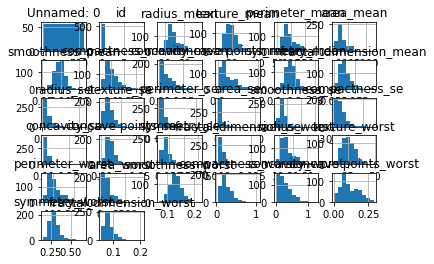

In [43]:
ds.hist()
plt.show()

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

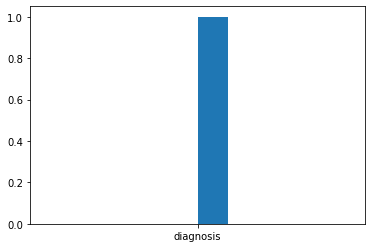

In [55]:
plt.hist('diagnosis')

(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

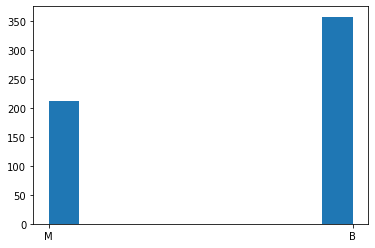

In [56]:
plt.hist(ds['diagnosis'])

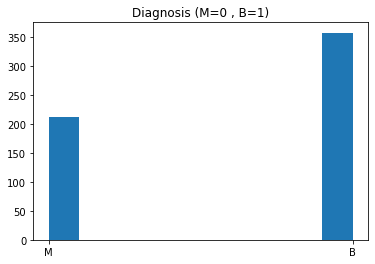

In [52]:
plt.hist(ds['diagnosis'])
plt.title("Diagnosis (M=0 , B=1)")
plt.show()

In [10]:
#lets split the dataset to train, test & validation
train,test_data = train_test_split(ds, test_size=0.3, random_state = None)

In [11]:
train, val = train_test_split(train, test_size=0.3, random_state = 42)

In [12]:
print(train.shape)
print(test_data.shape)
print(val.shape)


(278, 33)
(171, 33)
(120, 33)


In [13]:
y=ds["area_mean"]

In [14]:
x=ds.drop(columns="area_mean")

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4, random_state = None)


In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(341, 32)
(228, 32)
(341,)
(228,)
